In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [68]:

df = pd.read_csv('NetflixViewingHistory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1744 non-null   object
 1   Date    1744 non-null   object
dtypes: object(2)
memory usage: 27.4+ KB


In [69]:
separacion_lista = df.Title.str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,"[The Five Juanas, Season 1, Las Juanas]"
1,"[The Five Juanas, Season 1, The Bonfire]"
2,"[The Five Juanas, Season 1, The Package]"
3,"[The Five Juanas, Season 1, Too Late]"
4,"[The Five Juanas, Season 1, A Dangerous Man]"
...,...
1739,"[The Client List, Season 1, Tough Love]"
1740,"[The Client List, Season 1, Turn the Page]"
1741,"[The Client List, Season 1, The Rub of Sugar..."
1742,[Hot Girls Wanted]


In [70]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,"[The Five Juanas, Season 1, Las Juanas]",3
1,"[The Five Juanas, Season 1, The Bonfire]",3
2,"[The Five Juanas, Season 1, The Package]",3
3,"[The Five Juanas, Season 1, Too Late]",3
4,"[The Five Juanas, Season 1, A Dangerous Man]",3
...,...,...
1739,"[The Client List, Season 1, Tough Love]",3
1740,"[The Client List, Season 1, Turn the Page]",3
1741,"[The Client List, Season 1, The Rub of Sugar...",3
1742,[Hot Girls Wanted],1


In [71]:
separacion_lista.num_partes.value_counts()

3    1341
1     262
4      88
2      53
Name: num_partes, dtype: int64

In [72]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(3)

,Title,num_partes
9,[Little Women],1
39,[Murder Mystery],1
49,[Jurassic Park],1


In [73]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(3)

,Title,num_partes
19,"[Jumanji, The Next Level]",2
57,"[SAS, Rise of the Black Swan]",2
139,"[David Attenborough, A Life on Our Planet]",2


In [75]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(3)

,Title,num_partes
0,"[The Five Juanas, Season 1, Las Juanas]",3
1,"[The Five Juanas, Season 1, The Bonfire]",3
2,"[The Five Juanas, Season 1, The Package]",3


In [76]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(3)

,Title,num_partes
40,"[Turning Point, 9/11 and the War on Terror, ...",4
41,"[Countdown, Inspiration4 Mission to Space, L...",4
42,"[Countdown, Inspiration4 Mission to Space, L...",4


In [77]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

,Title,num_partes


Creacion de variables

In [78]:
separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,"[The Five Juanas, Season 1, Las Juanas]",3,serie
1,"[The Five Juanas, Season 1, The Bonfire]",3,serie
2,"[The Five Juanas, Season 1, The Package]",3,serie
3,"[The Five Juanas, Season 1, Too Late]",3,serie
4,"[The Five Juanas, Season 1, A Dangerous Man]",3,serie
...,...,...,...
1739,"[The Client List, Season 1, Tough Love]",3,serie
1740,"[The Client List, Season 1, Turn the Page]",3,serie
1741,"[The Client List, Season 1, The Rub of Sugar...",3,serie
1742,[Hot Girls Wanted],1,pelicula


In [79]:
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

,Title,Date,tipo
0,The Five Juanas: Season 1: Las Juanas,11/11/21,serie
1,The Five Juanas: Season 1: The Bonfire,11/11/21,serie
2,The Five Juanas: Season 1: The Package,11/11/21,serie
3,The Five Juanas: Season 1: Too Late,11/11/21,serie
4,The Five Juanas: Season 1: A Dangerous Man,11/10/21,serie
...,...,...,...
1739,The Client List: Season 1: Tough Love,5/6/17,serie
1740,The Client List: Season 1: Turn the Page,5/4/17,serie
1741,The Client List: Season 1: The Rub of Sugar Land,5/4/17,serie
1742,Hot Girls Wanted,5/3/17,pelicula


In [80]:
separacion_cols = df.Title.str.split(pat = ':', expand=True)
separacion_cols

,0,1,2,3
0,The Five Juanas,Season 1,Las Juanas,None
1,The Five Juanas,Season 1,The Bonfire,None
2,The Five Juanas,Season 1,The Package,None
3,The Five Juanas,Season 1,Too Late,None
4,The Five Juanas,Season 1,A Dangerous Man,None
...,...,...,...,...
1739,The Client List,Season 1,Tough Love,None
1740,The Client List,Season 1,Turn the Page,None
1741,The Client List,Season 1,The Rub of Sugar Land,None
1742,Hot Girls Wanted,None,None,None


In [81]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4']
separacion_cols

,nivel1,nivel2,nivel3,nivel4
0,The Five Juanas,Season 1,Las Juanas,None
1,The Five Juanas,Season 1,The Bonfire,None
2,The Five Juanas,Season 1,The Package,None
3,The Five Juanas,Season 1,Too Late,None
4,The Five Juanas,Season 1,A Dangerous Man,None
...,...,...,...,...
1739,The Client List,Season 1,Tough Love,None
1740,The Client List,Season 1,Turn the Page,None
1741,The Client List,Season 1,The Rub of Sugar Land,None
1742,Hot Girls Wanted,None,None,None


In [82]:
df = pd.concat([df,separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4
0,The Five Juanas: Season 1: Las Juanas,11/11/21,serie,The Five Juanas,Season 1,Las Juanas,None
1,The Five Juanas: Season 1: The Bonfire,11/11/21,serie,The Five Juanas,Season 1,The Bonfire,None
2,The Five Juanas: Season 1: The Package,11/11/21,serie,The Five Juanas,Season 1,The Package,None
3,The Five Juanas: Season 1: Too Late,11/11/21,serie,The Five Juanas,Season 1,Too Late,None
4,The Five Juanas: Season 1: A Dangerous Man,11/10/21,serie,The Five Juanas,Season 1,A Dangerous Man,None
...,...,...,...,...,...,...,...
1739,The Client List: Season 1: Tough Love,5/6/17,serie,The Client List,Season 1,Tough Love,None
1740,The Client List: Season 1: Turn the Page,5/4/17,serie,The Client List,Season 1,Turn the Page,None
1741,The Client List: Season 1: The Rub of Sugar Land,5/4/17,serie,The Client List,Season 1,The Rub of Sugar Land,None
1742,Hot Girls Wanted,5/3/17,pelicula,Hot Girls Wanted,None,None,None


Variables de fecha

In [83]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date',inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,fecha
0,The Five Juanas: Season 1: Las Juanas,serie,The Five Juanas,Season 1,Las Juanas,None,2021-11-11
1,The Five Juanas: Season 1: The Bonfire,serie,The Five Juanas,Season 1,The Bonfire,None,2021-11-11
2,The Five Juanas: Season 1: The Package,serie,The Five Juanas,Season 1,The Package,None,2021-11-11
3,The Five Juanas: Season 1: Too Late,serie,The Five Juanas,Season 1,Too Late,None,2021-11-11
4,The Five Juanas: Season 1: A Dangerous Man,serie,The Five Juanas,Season 1,A Dangerous Man,None,2021-11-10
...,...,...,...,...,...,...,...
1739,The Client List: Season 1: Tough Love,serie,The Client List,Season 1,Tough Love,None,2017-05-06
1740,The Client List: Season 1: Turn the Page,serie,The Client List,Season 1,Turn the Page,None,2017-05-04
1741,The Client List: Season 1: The Rub of Sugar Land,serie,The Client List,Season 1,The Rub of Sugar Land,None,2017-05-04
1742,Hot Girls Wanted,pelicula,Hot Girls Wanted,None,None,None,2017-05-03


In [84]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4
fecha,,,,,,
2021-11-11,The Five Juanas: Season 1: Las Juanas,serie,The Five Juanas,Season 1,Las Juanas,None
2021-11-11,The Five Juanas: Season 1: The Bonfire,serie,The Five Juanas,Season 1,The Bonfire,None
2021-11-11,The Five Juanas: Season 1: The Package,serie,The Five Juanas,Season 1,The Package,None
2021-11-11,The Five Juanas: Season 1: Too Late,serie,The Five Juanas,Season 1,Too Late,None
2021-11-10,The Five Juanas: Season 1: A Dangerous Man,serie,The Five Juanas,Season 1,A Dangerous Man,None
...,...,...,...,...,...,...
2017-05-06,The Client List: Season 1: Tough Love,serie,The Client List,Season 1,Tough Love,None
2017-05-04,The Client List: Season 1: Turn the Page,serie,The Client List,Season 1,Turn the Page,None
2017-05-04,The Client List: Season 1: The Rub of Sugar Land,serie,The Client List,Season 1,The Rub of Sugar Land,None


In [85]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [86]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,
2021-11-11,The Five Juanas: Season 1: Las Juanas,serie,The Five Juanas,Season 1,Las Juanas,None,2021,November,11,Thursday
2021-11-11,The Five Juanas: Season 1: The Bonfire,serie,The Five Juanas,Season 1,The Bonfire,None,2021,November,11,Thursday
2021-11-11,The Five Juanas: Season 1: The Package,serie,The Five Juanas,Season 1,The Package,None,2021,November,11,Thursday
2021-11-11,The Five Juanas: Season 1: Too Late,serie,The Five Juanas,Season 1,Too Late,None,2021,November,11,Thursday
2021-11-10,The Five Juanas: Season 1: A Dangerous Man,serie,The Five Juanas,Season 1,A Dangerous Man,None,2021,November,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...
2017-05-06,The Client List: Season 1: Tough Love,serie,The Client List,Season 1,Tough Love,None,2017,May,6,Saturday
2017-05-04,The Client List: Season 1: Turn the Page,serie,The Client List,Season 1,Turn the Page,None,2017,May,4,Thursday
2017-05-04,The Client List: Season 1: The Rub of Sugar Land,serie,The Client List,Season 1,The Rub of Sugar Land,None,2017,May,4,Thursday


Analisis

In [88]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Marcel, llevas usando Netflix {tiempo.days} dias')

Marcel, llevas usando Netflix 1657 dias


In [91]:
coste_mensual = 14

gasto_total = tiempo.days / 30 * coste_mensual

gasto = gasto_total /4

print(f'Marcel, hasta ahora te has gastado {gasto} euros en Netflix')

Marcel, hasta ahora te has gastado 193.31666666666666 euros en Netflix


In [92]:
media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2021].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Marcel, al año dedicas {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')

Marcel, al año dedicas 11 dias de tu vida a ver series y 6 dias de tu vida a ver pelis


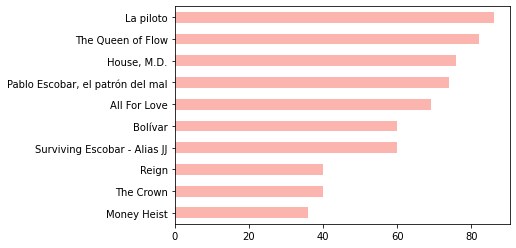

In [93]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

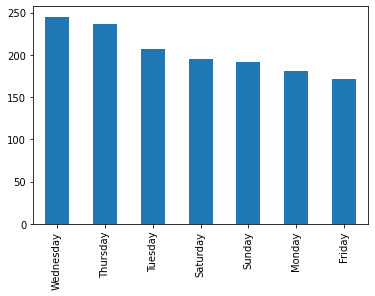

In [94]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

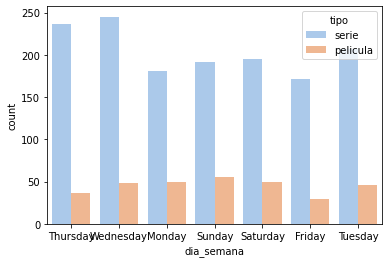

In [95]:
sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

Distribucion por mes antes de la pandemia

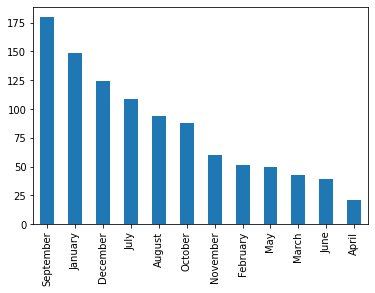

In [96]:
df.loc[df.año < 2020].mes.value_counts().plot.bar();

Datos con los de la pandemia

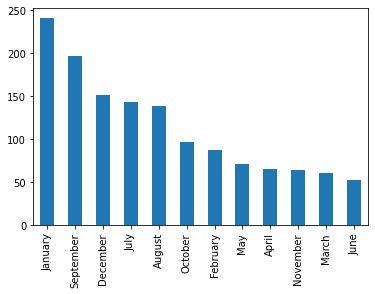

In [97]:
df.loc[df.año < 2021].mes.value_counts().plot.bar();

Consumo anual

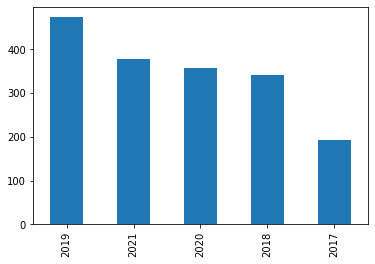

In [98]:
df.año.value_counts().plot.bar();